In [11]:
from scripts.sequence_data import test_dataset
from torch.utils.data import DataLoader
import torch
import os
import torch.nn as nn
import torch.optim as optim
from config import BATCH_SIZE, SEED, EPOCHS
from models import LSTMModel
from sklearn.metrics import confusion_matrix
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
model = LSTMModel()
model.load_state_dict(torch.load('LSTM.pt'))
model.eval()

LSTMModel(
  (lstm): LSTM(34, 80, num_layers=10, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=80, out_features=15, bias=True)
)

In [7]:
model.to(device)

LSTMModel(
  (lstm): LSTM(34, 80, num_layers=10, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=80, out_features=15, bias=True)
)

In [8]:
y_true = []
y_pred = []

with torch.no_grad():
    for x, y in test_dataloader:
        out = model(x.to(device))
        _, predicted = torch.max(out, 1)
        y_true.extend(y.numpy().tolist())
        y_pred.extend(predicted.cpu().numpy().tolist())


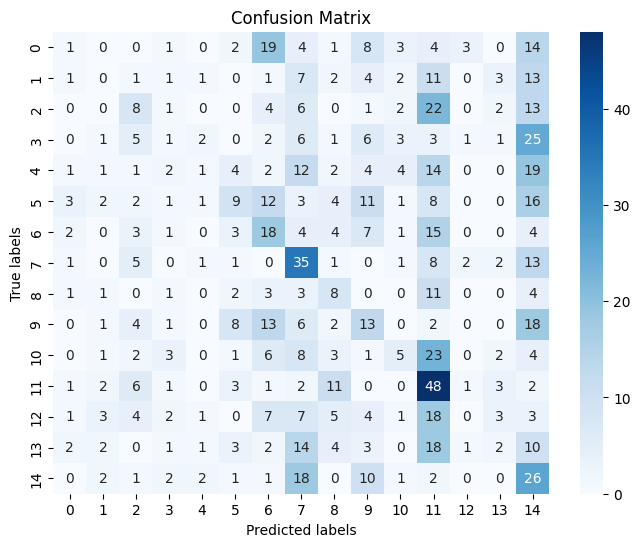

In [13]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(conf_matrix.shape[1]), yticklabels=np.arange(conf_matrix.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
def calculate_classification_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    metrics_dict = {
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }
    return metrics_dict

In [17]:
metrics_dict = calculate_classification_metrics(y_true, y_pred)

In [18]:
metrics_dict

{'precision': 0.14364640757470656,
 'recall': 0.17518891605948772,
 'f1-score': 0.1380107196002548}